<a href="https://colab.research.google.com/github/wiradear/Practical-Machine-Leaning-and-Data-Mining/blob/main/6409650311.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1 - Linear Regression

ในการบ้านชิ้นนี้ นักศึกษาจะได้เห็นตัวอย่างความสัมพันธ์ระหว่างความซับซ้อนของโมเดลและความ generalization โดยการทดลองปรับค่าพารามิเตอร์ที่สำคัญ ๆ ของโมเดลการเรียนรู้แบบมีผู้สอนหลายโมเดล

# เริ่มต้น: ให้รันโค้ดต่อไปนี้เพื่อสร้างข้อมูลและสำรวจข้อมูลเบื้องต้น

Import ไลบารีที่จำเป็น และสร้างชุดข้อมูลจำลองเพื่อใช้ในส่วนต่อไป

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


np.random.seed(0)
n = 15
x = np.linspace(0,10,n) + np.random.randn(n)/5
y = np.sin(x)+x/6 + np.random.randn(n)/10

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)


ดูการกระจายตัวของข้อมูลที่สร้างขึ้น

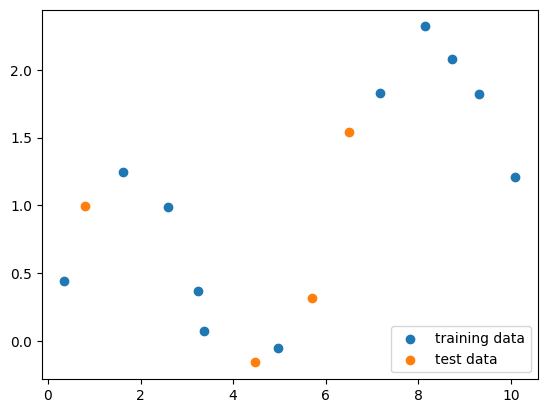

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(X_train, y_train, label='training data')
plt.scatter(X_test, y_test, label='test data')
plt.legend(loc=4);


# ข้อ 1

ให้เติมส่วนของโปรแกรมเพื่อทดลองเพิ่มฟีเชอร์แบบ Polynomial ให้กับชุดข้อมูลฝึกสอนส่วน X_train ด้วย degree=1, 3, 6 และ 9 ในแต่ละ degree ให้สร้างโมเดล Linear Regression (OLS) และฝึกสอนโมเดลด้วยข้อมูลที่เพิ่มฟีเชอร์มาแล้ว และลองทำนายค่า 100 ค่าของข้อมูล x ที่มีช่วงตั้งแต่ 0-10 (ใช้ np.linspace(0,10,100)) และเก็บผลที่ได้ใน numpy arrayโดยแถวแรกของอาร์เรย์คือผลลัพธ์ของโมเดลที่ใช้โพลีโนเมียลฟีเชอร์ degree=1 แถวที่สองเป็นผลลัพธ์ของ degree=3 แถวที่สามเป็นผลลัพธ์ของ degree=6 และแถวที่สี่เป็นผลลัพธ์ของ degree=9 ตามลำดับ


The figure above shows the fitted models plotted on top of the original data.

<br>
*โค้ดในส่วนนี้ควรจะได้ข้อมูลใน degree_depreciations ที่มีขนาด (4, 100) เก็บ score ของการทำนายด้วยโมเดลที่ใช้ฟีเชอร์โพลีโนเมียบ degree 1,3,6,9 ในแต่ละแถว ตามลำดับ*

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

degree_predictions = np.zeros((4,100)) # create array that contain 0 in 4 rows, 100 columns

# Your code here

def q1():
  def func(dgr):
    poly = PolynomialFeatures(degree = dgr)
    # X_train = X_train.reshape(-1, 1) # transfrom to any num of rows(from calculate) and 1 column
    x_poly = poly.fit_transform(X_train.reshape(-1, 1))

    lr = LinearRegression().fit(x_poly, y_train)
    interval = np.linspace(0, 10, 100) # start, stop, num of sample
    y_pred = lr.predict(poly.fit_transform(interval.reshape(100, 1))) # 100 rows
    return y_pred.reshape(1, 100)

  ans =  func(1)

  for dgr in [3, 6, 9]:
    tmp = func(dgr)
    ans = np.vstack([ans, tmp]) # แทรกข้อมูลในแนวนอน
  return ans

q1()


array([[ 2.53040195e-01,  2.69201547e-01,  2.85362899e-01,
         3.01524251e-01,  3.17685603e-01,  3.33846955e-01,
         3.50008306e-01,  3.66169658e-01,  3.82331010e-01,
         3.98492362e-01,  4.14653714e-01,  4.30815066e-01,
         4.46976417e-01,  4.63137769e-01,  4.79299121e-01,
         4.95460473e-01,  5.11621825e-01,  5.27783177e-01,
         5.43944529e-01,  5.60105880e-01,  5.76267232e-01,
         5.92428584e-01,  6.08589936e-01,  6.24751288e-01,
         6.40912640e-01,  6.57073992e-01,  6.73235343e-01,
         6.89396695e-01,  7.05558047e-01,  7.21719399e-01,
         7.37880751e-01,  7.54042103e-01,  7.70203454e-01,
         7.86364806e-01,  8.02526158e-01,  8.18687510e-01,
         8.34848862e-01,  8.51010214e-01,  8.67171566e-01,
         8.83332917e-01,  8.99494269e-01,  9.15655621e-01,
         9.31816973e-01,  9.47978325e-01,  9.64139677e-01,
         9.80301028e-01,  9.96462380e-01,  1.01262373e+00,
         1.02878508e+00,  1.04494644e+00,  1.06110779e+0


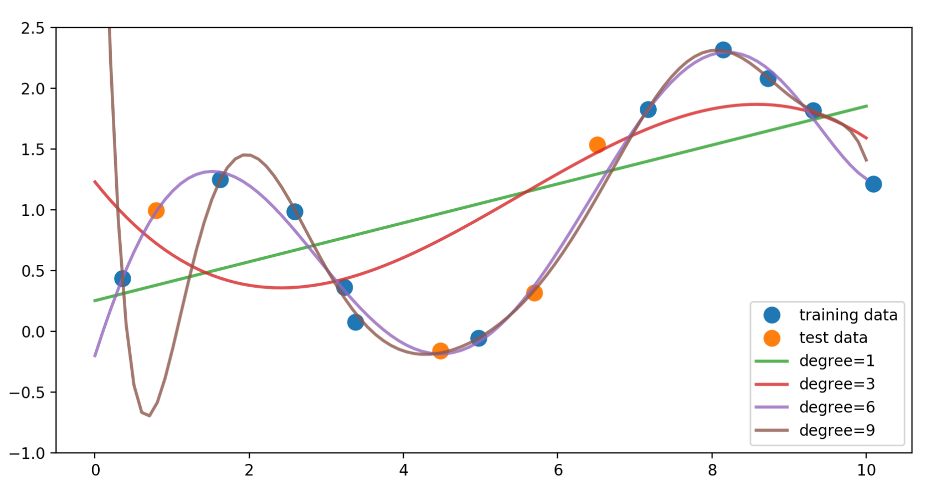

ให้ลองพล็อตกราฟของผลลัพธ์ที่ได้ใน degree_depreciations ด้วยการรันโค้ดด้านล่างนี้ ถ้าคำตอบถูกต้อง กราฟที่ได้ควรเป็นแบบด้านบนนี้


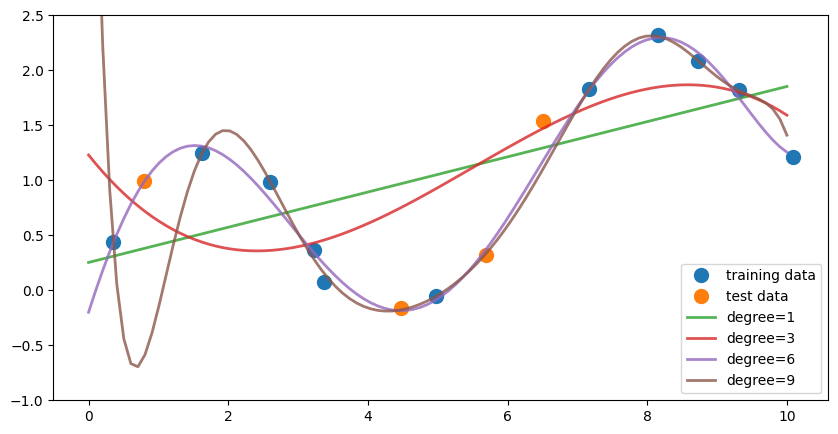

In [ ]:
import matplotlib.pyplot as plt

def plot_question_one(degree_predictions):
  plt.figure(figsize=(10,5))
  plt.plot(X_train, y_train, 'o', label='training data', markersize=10)
  plt.plot(X_test, y_test, 'o', label='test data', markersize=10)
  for i,degree in enumerate([1,3,6,9]):
    plt.plot(np.linspace(0,10,100), degree_predictions[i], alpha=0.8, lw=2, label='degree={}'.format(degree))
    plt.ylim(-1,2.5)
    plt.legend(loc=4)

plot_question_one(q1())

# ข้อ 2

ให้เติมส่วนของโปรแกรมที่สร้างโมเดล 10 โมเดลด้วยฟีเชอร์โพลีโนเมียล degree = 0-9 ในแต่ละโมเดลให้คำนวณค่า R^2 ของ training data และค่า R^2 ของ test data และเก็บไว้ใน numpy array ที่มีขนาด (10,0)
*

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

r2_train = np.zeros(10)
r2_test = np.zeros(10)

# Your code here
def q2():
    dgr = np.arange(0, 10) #start, stop
    poly = [PolynomialFeatures(degree=i) for i in dgr]

    #list เก็บ score ของ 1-10
    r2_train = []
    r2_test = []

    rng = range(0, 10)
    for i in rng:
        x_poly = poly[i].fit_transform(x.reshape(-1,1))
        x_train_poly, x_test_poly, y_train_poly, y_test_poly = train_test_split(x_poly, y, random_state=0)
        lr = LinearRegression()
        lr = lr.fit(x_train_poly, y_train_poly)

        r2_train.append(lr.score(x_train_poly, y_train_poly)) # record training set accuracy
        r2_test.append(lr.score(x_test_poly, y_test_poly)) # record generalization set accuracy

    r2_train = np.array(r2_train)
    r2_test = np.array(r2_test)
    return r2_train, r2_test
q2()

print(r2_train.shape)
print(r2_test.shape)



(10,)
(10,)


### ข้อ 3

จากค่า R^2 ที่ได้ในข้อ 2 ของโพลิโนเมียล degree =  0-9 ให้เขียนโค้ดเพื่อหาค่า degree ของโพลิโนเมียลฟีเชอร์ ที่ทำให้โมเดล underfit, overfit และ generalization (คำตอบจะมี 3 ค่า)
####Hint: คำตอบมีหลายแบบ นักศึกษาอาจใช้การหาค่าความแตกต่างระหว่าง R^2 ของ training และ R^2 ของtesting เป็นตัวตัดสิน

(0, 9, 6)

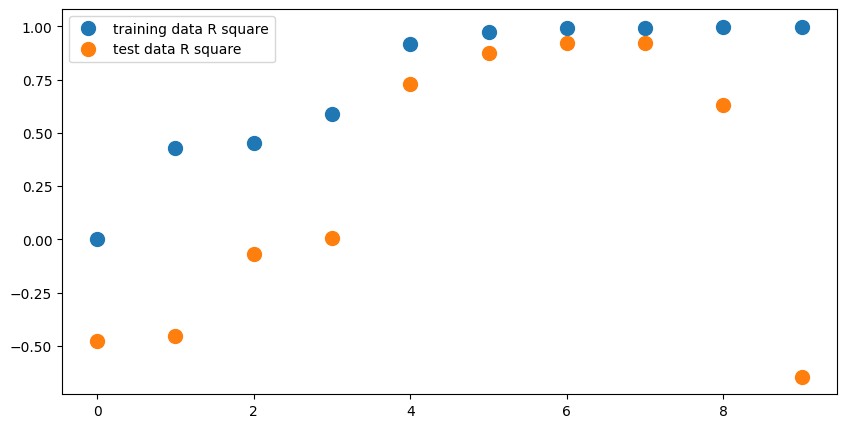

In [ ]:
# Your code is here
# test score สูงสุด + (train+testไม่ต่างกันมาก)

def q3():
  plt.figure(figsize=(10, 5))
  plt.plot(np.arange(10), q2()[0], 'o', label='training data R square', markersize=10)
  plt.plot(np.arange(10), q2()[1], 'o', label='test data R square', markersize=10)
  plt.legend(loc=0)
  return (0, 9, 6)

q3()

### ข้อ 4

การฝึกสอนโมเดลด้วยฟีเชอร์โพลิโนเมียบดีกรีสูงอาจจะทำให้โมเดลมีความซับซ้อนมากเกินไปจนเกิดการ overfit ดังนั้นเรามักจะทำ regularization เพื่อลดความซัซ้อนด้วยการเปลี่ยนมาใช้ Lasso หรือ Ridge Regression
สำหรับข้อนี้ ให้สร้างสองโมเดล โมเดลแรกสร้างด้วย Linear Regression ธรรมดาใช้ค่า default parameters และโมเดลที่สองสร้างด้วย Lasso Regression ด้วยค่าอัลฟ่า = 0.01 และ max_iter = 10000 โดยให้ฝึกสอนทั้งสองโมเดลด้วยข้อมูล X_train ที่เพิ่มโพลีโนเมียลฟีเชอร์ degree=12 จากนั้นให้เปรียบเทียบค่า R^2 ของโมเดลทั้งสองเมื่อทดสอบกับ test data


*โค้ดส่วนนี้ควรจะพิมพ์ค่า R^2 ของ LinearRegression และ Lasso*

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.metrics import r2_score


# Your code is here

def q4():
    dgr = 12
    poly = PolynomialFeatures(degree=dgr)
    x_poly = poly.fit_transform(x.reshape(-1,1))
    X_train, X_test, y_train, y_test = train_test_split(x_poly, y, random_state=0)

    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred_linear = lr.predict(X_test)
    r2_lr_test_score = r2_score(y_test, y_pred_linear)

    lasso = Lasso(alpha=0.01, max_iter=10000)
    lasso.fit(X_train, y_train)
    y_pred_lasso = lasso.predict(X_test)
    r2_lasso_test_score = r2_score(y_test, y_pred_lasso)

    print("Test score of LinearRegression R^2 : {}".format(r2_lr_test_score))
    print("Test score of Lasso R^2 : {}".format(r2_lasso_test_score))

q4()







Test score of LinearRegression R^2 : -4.311996022859516
Test score of Lasso R^2 : 0.8406625614750236


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.556e-01, tolerance: 6.895e-04
  model = cd_fast.enet_coordinate_descent(
